In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Для работы с нейронной сетью используется библиотека **fastai V1**, базирующаяся на **Pytorch 1.0**.
Библиотека fastai предоставляет множество полезных функций, которые позволяют быстро и легко создавать нейронные сети и обучать модели.

Из метрик будем использовать точность определения и процент ошибок.

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

**dataset** - название и путь к набору данных, содержащему фотографии кошачьих пород.<br>
**image_path** - путь к фотографиям пород, рассортированным по породам.

Фотографии из датасета проименованы по принципу *порода_номер.jpg*

In [3]:
dataset = 'cat-breeds-dataset'
image_path = dataset + '/breeds'

fnames = get_image_files(dataset, recurse = True)
fnames[:5]

[WindowsPath('cat-breeds-dataset/breeds/Abyssinian/Abyssinian_1.jpg'),
 WindowsPath('cat-breeds-dataset/breeds/Abyssinian/Abyssinian_10.jpg'),
 WindowsPath('cat-breeds-dataset/breeds/Abyssinian/Abyssinian_100.jpg'),
 WindowsPath('cat-breeds-dataset/breeds/Abyssinian/Abyssinian_101.jpg'),
 WindowsPath('cat-breeds-dataset/breeds/Abyssinian/Abyssinian_102.jpg')]

Переменная **pat** содержит регулярное выражение, которое будет использовано для извлечения названия породы из имени файла.

In [4]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

Загружаем фотографии из набора и применяем к ним стандартные трансформации и нормализацию, которые предоставляет **fastai**.

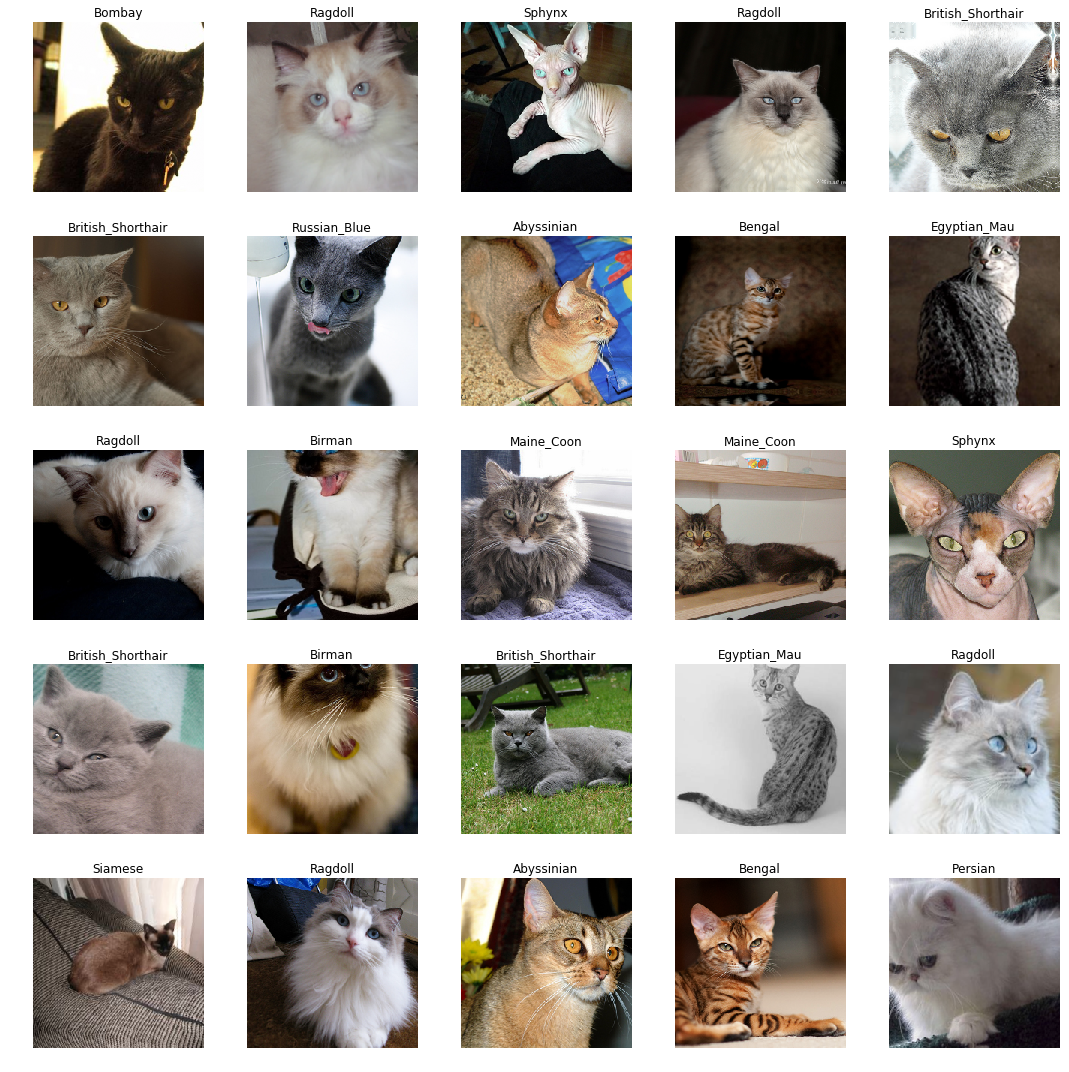

In [5]:
data = ImageDataBunch.from_name_re(dataset, fnames, pat, ds_tfms = get_transforms(), size = 228).normalize(imagenet_stats)
data.show_batch(rows = 5, figsize = (15,15))

Все породы, содержащиеся в наборе данных:

In [6]:
print(data.classes)
data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx']


12

Фотографий из набора данных используется:<br>
*для тренировки* / *для валидации*

In [7]:
print(len(data.train_ds), ' / ', len(data.valid_ds))

1910  /  477


Для обучения используется фреймворк остаточного обучения **ResNet** с преобученной моделью **resnet34**

In [8]:
learn = cnn_learner(data, models.resnet34, metrics = [error_rate, accuracy])
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [9]:
learn.fit_one_cycle(4)

In [10]:
learn.save('breeds-nn-1')

In [11]:
interpretator = ClassificationInterpretation.from_learner(learn)

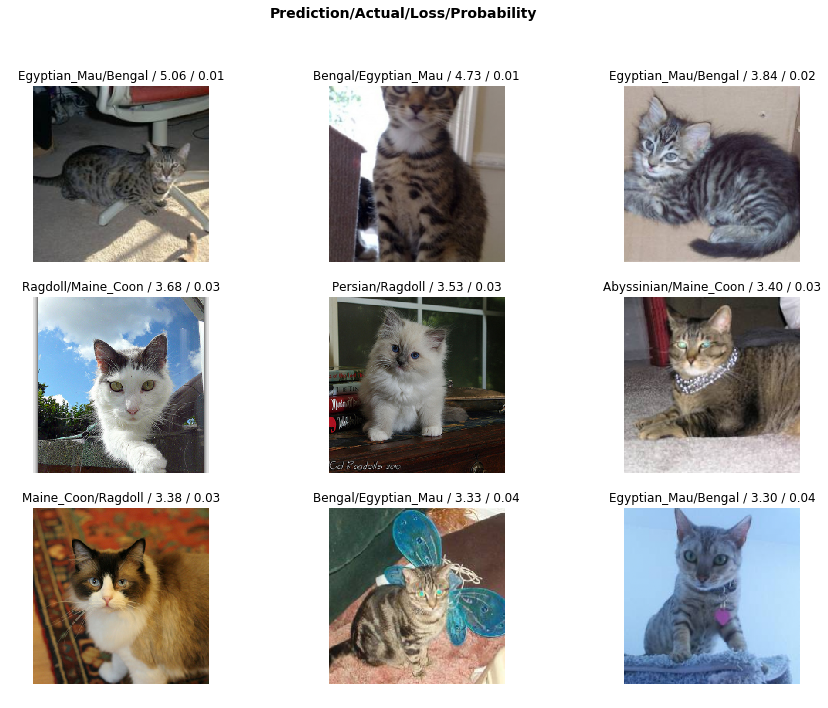

In [12]:
interpretator.plot_top_losses(9, figsize = (15,11))

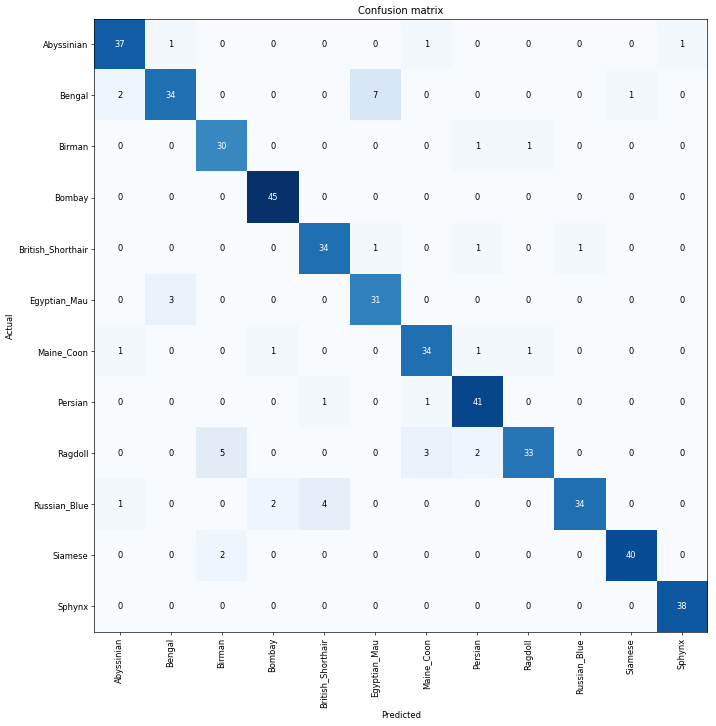

In [13]:
interpretator.plot_confusion_matrix(figsize = (12,12), dpi = 60)

In [14]:
interpretator.most_confused(min_val = 2)

[('Bengal', 'Egyptian_Mau', 7),
 ('Ragdoll', 'Birman', 5),
 ('Russian_Blue', 'British_Shorthair', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Ragdoll', 'Maine_Coon', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Ragdoll', 'Persian', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('Siamese', 'Birman', 2)]

In [15]:
learn.unfreeze()
learn.fit_one_cycle(1)

In [16]:
learn.load('breeds-nn-1')

Learner(data=ImageDataBunch;

Train: LabelList (1910 items)
x: ImageList
Image (3, 228, 228),Image (3, 228, 228),Image (3, 228, 228),Image (3, 228, 228),Image (3, 228, 228)
y: CategoryList
Abyssinian,Abyssinian,Abyssinian,Abyssinian,Abyssinian
Path: cat-breeds-dataset;

Valid: LabelList (477 items)
x: ImageList
Image (3, 228, 228),Image (3, 228, 228),Image (3, 228, 228),Image (3, 228, 228),Image (3, 228, 228)
y: CategoryList
Ragdoll,Siamese,Persian,Maine_Coon,Bombay
Path: cat-breeds-dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, e

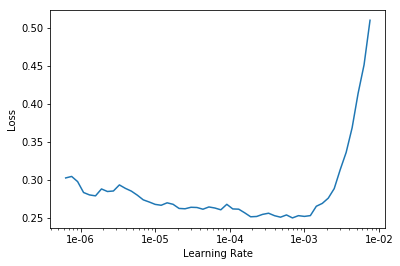

In [18]:
learn.lr_find()
learn.recorder.plot()

In [19]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr = 1e-04)

In [20]:
learn.save('breeds-nn-1_5')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


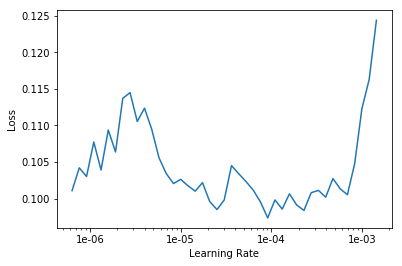

In [21]:
learn.lr_find()
learn.recorder.plot()

In [22]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr = 1e-053)